# Installing Dependencies

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-04-05 20:42:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-05 20:42:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-05 20:42:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!pip install wget

In [ ]:
# common libs
import os
import wget
import gzip
import shutil
import pandas as pd
import numpy as np

# tensorflow and keras libs
import tensorflow as tf
import tensorflow_datasets as tfds 
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import TextVectorization, Conv1D, Dense, Softmax, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding
from tensorflow.data import Dataset
from tensorflow.keras import layers, Input, Model
from xgboost import XGBRegressor

# visvalisation libs
import matplotlib.pyplot as plt
import seaborn as sn
!pip install visualkeras
import visualkeras

# NLP libs
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer, TFBertModel, BertConfig
import string
import nltk
from nltk.corpus import stopwords
nltk.download('popular')

     |████████████████████████████████| 992 kB 4.0 MB/s 
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |  

True

# Importing Datasets

## Connecting google drive and kaggle

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
!mkdir /root/.kaggle
%cd /root/.kaggle
!ls

/root/.kaggle


In [ ]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

## Importing ISOT Dataset [1]

In [ ]:
%cd /content/
!kaggle datasets download -d csmalarkodi/isot-fake-news-dataset

/content
 81% 33.0M/41.0M [00:00<00:00, 41.6MB/s]
100% 41.0M/41.0M [00:00<00:00, 43.1MB/s]


In [ ]:
!unzip isot-fake-news-dataset.zip

Archive:  isot-fake-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## Importing Dataset DS1 [2]

In [ ]:
%cd /content/
!kaggle datasets download -d jruvika/fake-news-detection

/content
100% 4.89M/4.89M [00:00<00:00, 23.4MB/s]
100% 4.89M/4.89M [00:00<00:00, 23.3MB/s]


In [ ]:
!unzip fake-news-detection.zip

Archive:  fake-news-detection.zip
  inflating: data.csv                
  inflating: data.h5                 


## Importing Dataset DS2 [3]

In [ ]:
%cd /content/
!kaggle competitions download -c fake-news

/content
 71% 33.0M/46.5M [00:01<00:00, 22.9MB/s]
100% 46.5M/46.5M [00:01<00:00, 25.8MB/s]


In [ ]:
!unzip fake-news.zip

Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


# Preprocessing

## Generalising the dataset attributes

### Building unified ISOT dataset

In [ ]:
fake = pd.read_csv('/content/Fake.csv')
fake.insert(loc=fake.columns.get_loc('date')+1,
          column='label',
          value=0)
true = pd.read_csv('/content/True.csv')
true.insert(loc=fake.columns.get_loc('date')+1,
          column='label',
          value=1)
isot_df = pd.concat([fake,true])
isot_df = isot_df.sample(frac=1, random_state=42).reset_index(drop=True)
isot_df = isot_df.drop(columns=['subject', 'date'])

X_train_isot, X_test_isot, y_train_isot, y_test_isot = train_test_split(isot_df[['title','text']], isot_df['label'], test_size=0.33)
X_train_isot.head(5)

,title,text
24871,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...
27532,CNBC DEBATE HACK Proves Allegiance To Democrat...,By looking at the two Democrat presidential ca...
6114,Turkey opens military base in Mogadishu to tra...,MOGADISHU/ANKARA (Reuters) - Turkey opened its...
7099,"For Trump, it was the lost art of the deal","WASHINGTON (Reuters) - In the end, the Closer ..."
2951,"Despite vow, Trump Organization not tracking a...",WASHINGTON (Reuters) - President Donald Trump’...


### Building DS1 dataset

In [ ]:
ds1 = pd.read_csv("data.csv")
ds1 = ds1.drop(columns=['URLs'])
ds1.rename(columns={'Headline': 'title'}, inplace=True)
ds1.rename(columns={'Body': 'text'}, inplace=True)
ds1.rename(columns={'Label': 'label'}, inplace=True)
ds1 = ds1.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_ds1, X_test_ds1, y_train_ds1, y_test_ds1 = train_test_split(ds1[['title','text']], ds1['label'], test_size=0.33)
X_train_ds1.head()

,title,text
828,"Kim Wall: Divers find head, legs of missing jo...","Copenhagen, Denmark (CNN) Divers have found th..."
2758,10/7 Post-Season: Bad Day at the Shop...0-for-...,An Embattled Pharmaceutical Company That Sells...
2667,US Navy is running a black project to detect A...,An expert in UFOs has said that the US Navy is...
1019,"10/1 TRS-PNC Era: Wildcard Win, TRS Closes, Fr...",A Potato Battery Can Light up a Room for Over ...
690,Nunes signs off on new subpoenas to firm behin...,(CNN) The chairman of the House intelligence c...


### Building DS2 dataset

In [ ]:
ds2_train = pd.read_csv("train.csv")
ds2_test = pd.read_csv("test.csv")

ds2_train = ds2_train.drop(columns=['author','id'])
ds2_test = ds2_test.drop(columns=['author','id'])

train_X_ds2 = ds2_train[['title','text']]
test_X_ds2 = ds2_test[['title','text']]

train_Y_ds2 = ds2_train['label']
test_Y_ds2 = ds2_test['label']

test_X_ds2.head()

## Merging the dataset

In [ ]:
train_X = pd.DataFrame(columns=['title', 'text'])
train_X = train_X.append([X_train_isot, X_train_ds1, train_X_ds2])
train_Y = pd.concat([y_train_isot, y_train_ds1, train_Y_ds2])
test_X = pd.concat([X_test_isot, X_test_ds1, test_X_ds2])
test_Y = pd.concat([y_test_isot, y_test_ds1, test_Y_ds2])
train_Y.shape

(32767,)

In [ ]:
true_count = train_Y.value_counts()
true_count

0    17127
1    15640
Name: label, dtype: int64

## Removing unwanted characters

In [ ]:
# Removing special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    train_X['title'] = train_X['title'].str.replace(char, ' ')
    train_X['text'] = train_X['text'].str.replace(char, ' ')
    test_X['title'] = test_X['title'].str.replace(char, ' ')
    test_X['text'] = test_X['text'].str.replace(char, ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version

In [ ]:
# Lower casing all the characters
train_X['text']=train_X['text'].str.lower()
train_X['title']=train_X['title'].str.lower()
test_X['text']=test_X['text'].str.lower()
test_X['title']=test_X['title'].str.lower()
train_X.head()

,title,text
24871,do you want to save america from hillary shar...,watch even her friends on the left appear to ...
27532,cnbc debate hack proves allegiance to democrat...,by looking at the two democrat presidential ca...
6114,turkey opens military base in mogadishu to tra...,mogadishu ankara reuters turkey opened its...
7099,for trump it was the lost art of the deal,washington reuters in the end the closer ...
2951,despite vow trump organization not tracking a...,washington reuters president donald trump’...


In [ ]:
train_X["clean_text"] = train_X["text"].astype(str) + train_X["title"]
test_X["clean_text"] = test_X["text"].astype(str) + test_X["title"]

In [ ]:
train_X["clean_text"]

24871    watch  even her friends on the left appear to ...
27532    by looking at the two democrat presidential ca...
6114     mogadishu ankara  reuters    turkey opened its...
7099     washington  reuters    in the end  the closer ...
2951     washington  reuters    president donald trump’...
                               ...                        
476      milan brussels  reuters    italian toll road g...
342      image caption the order of service gave both d...
2913     lawrence thomas officially makes switch to ful...
304      by catherine j  frompovich\non september 13  2...
3632     nfl football   miami dolphins vs new orleans s...
Name: clean_text, Length: 32767, dtype: object

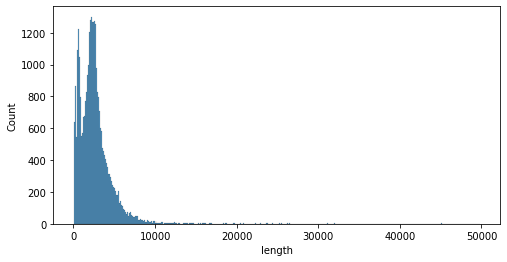

In [ ]:
train_X['length'] = train_X['clean_text'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(train_X[('length')])

## Vectorising the corpus

In [ ]:
# Vectorising the corpus
vectorizer = TextVectorization(max_tokens=2000, output_sequence_length=300)
sliced_corpus = Dataset.from_tensor_slices(train_X['clean_text']).batch(128)
vectorizer.adapt(sliced_corpus)

In [ ]:
vocubalory = vectorizer.get_vocabulary()
word_index = dict(zip(vocubalory, range(len(vocubalory))))

## Importing GloVe & Word Embedding

In [ ]:
# Generating the indexing array from the pretrain Glove model
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        word, vals = line.split(maxsplit=1)
        vals = np.fromstring(vals, "f", sep=" ")
        embeddings_index[word] = vals

In [ ]:
# Required variables for the generating embedding matrix
num_tokens = len(vocubalory) + 2
embedding_dim = 100
hits = 0
misses = 0

# Preparing embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

In [ ]:
# Generating the embedding layer
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

# CNN based model





In [ ]:
# Model Definition
input_seq = Input(shape=(None,), dtype="int64")
embedded_seq = embedding_layer(input_seq)
x = Conv1D(256, 5, activation="relu")(embedded_seq)
x = MaxPooling1D(5)(x)
x = Dropout(0.5)(x)
x = Conv1D(256, 5, activation="relu")(x)
x = MaxPooling1D(4)(x)
x = Dropout(0.5)(x)
x = Conv1D(128, 5, activation="relu")(x)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
output = Dense(2)(x)

model = Model(input_seq, output)
model.summary()

model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['acc'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         200200    
                                                                 
 conv1d_12 (Conv1D)          (None, None, 256)         128256    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, None, 256)        0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, None, 256)         0         
                                                                 
 conv1d_13 (Conv1D)          (None, None, 256)         327936    
                                                           

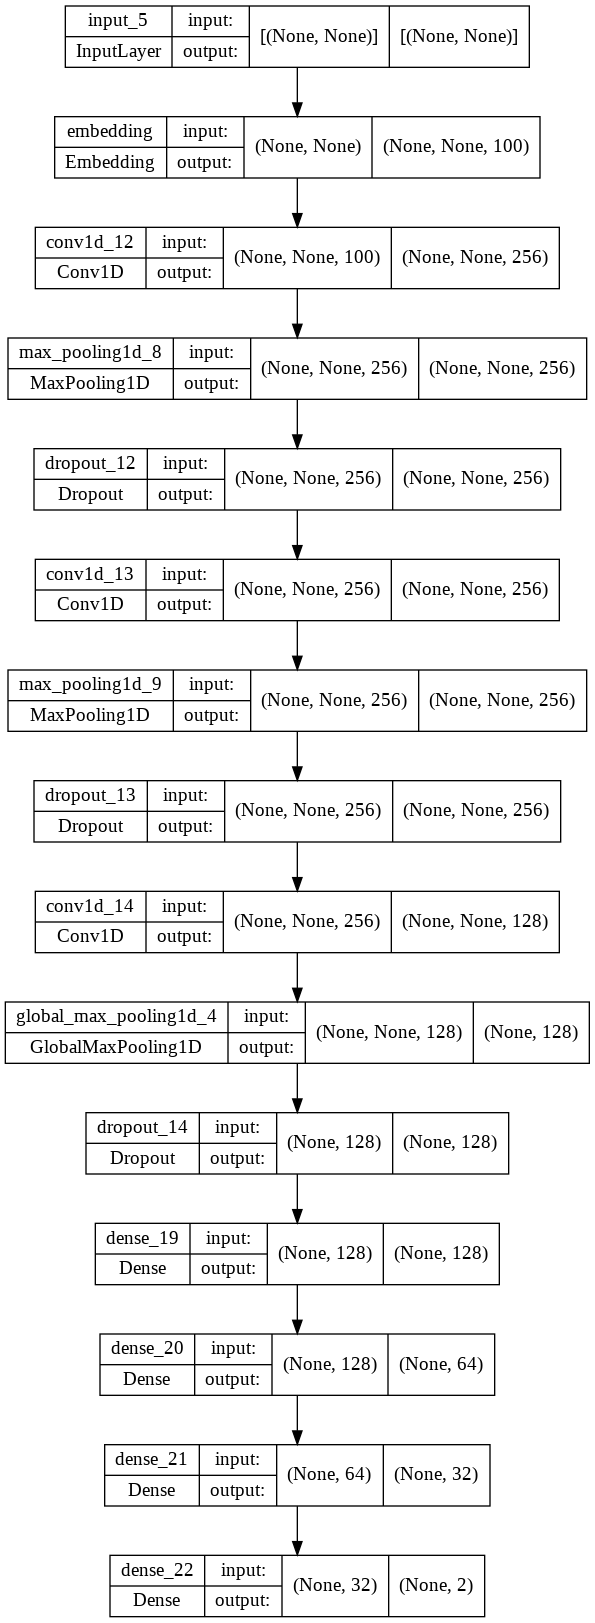

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
x_train = vectorizer(np.array([[s] for s in train_X["clean_text"]])).numpy()
y_train = np.array(train_Y)

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience=20, verbose=1, mode = 'min')]
history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2, callbacks=[callbacks])

Epoch 1/50
820/820 [==============================] - 6s 7ms/step - loss: 0.2018 - acc: 0.8972 - val_loss: 0.4661 - val_acc: 0.8767
Epoch 2/50
820/820 [==============================] - 6s 7ms/step - loss: 0.0218 - acc: 0.9949 - val_loss: 0.9032 - val_acc: 0.8749
Epoch 3/50
820/820 [==============================] - 6s 7ms/step - loss: 0.0137 - acc: 0.9964 - val_loss: 0.5368 - val_acc: 0.8843
Epoch 4/50
820/820 [==============================] - 6s 7ms/step - loss: 0.0132 - acc: 0.9968 - val_loss: 1.0878 - val_acc: 0.8750
Epoch 5/50
820/820 [==============================] - 6s 7ms/step - loss: 0.0136 - acc: 0.9966 - val_loss: 0.6787 - val_acc: 0.8749
Epoch 6/50
820/820 [==============================] - 6s 7ms/step - loss: 0.0133 - acc: 0.9966 - val_loss: 0.9112 - val_acc: 0.8819
Epoch 7/50
820/820 [==============================] - 6s 7ms/step - loss: 0.0086 - acc: 0.9978 - val_loss: 0.8530 - val_acc: 0.8845
Epoch 8/50
820/820 [==============================] - 6s 7ms/step - loss: 0.

## Evaluating the results

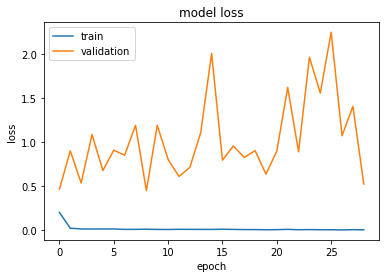

In [ ]:
# summarizing history for loss for new model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
x_test = vectorizer(np.array([[s] for s in test_X["clean_text"]])).numpy()
y_test = np.array(test_Y)

In [ ]:
pred = model.predict(x_test)
y_classes = pred.argmax(axis=-1)

In [ ]:
print(cr(y_test, y_classes, target_names=['fake','true']))

              precision    recall  f1-score   support

        fake       0.96      0.99      0.98      8491
        true       0.99      0.95      0.97      7649

    accuracy                           0.97     16140
   macro avg       0.97      0.97      0.97     16140
weighted avg       0.97      0.97      0.97     16140



Text(0.5, 1.0, 'Confusion Matrix')

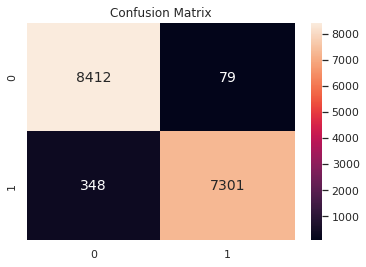

In [ ]:
cm2 = cm(y_test, y_classes, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

## Save and generate a TensorFlow JS model

In [ ]:
model.save("rm.h5")
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras rm.h5 ./jsweights
# The JSON file inside the ./jsweights is to be used in BE

# XGBoost model

[21:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy Score on XGBoost: 
 95.96654275092938

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      8491
           1       1.00      0.92      0.96      7649

    accuracy                           0.96     16140
   macro avg       0.96      0.96      0.96     16140
weighted avg       0.96      0.96      0.96     16140



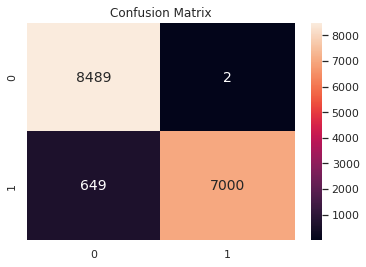

In [ ]:
xgb = XGBRegressor(n_estimators=120, leanring_rate=0.075)
xgb.fit(x_train, y_train)
#xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

predicted1 = xgb.predict(x_test)
score1 = accuracy_score(y_test, (predicted1 > 0.5))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.5, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.5)))

# References

[1] Fake news database - build a system to identify unreliable news articles. https://www.kaggle.com/c/fake-news

[2] Iftikhar Ahmad, Muhammad Yousaf, Suhail Yousaf, and Muham-
mad Ovais Ahmad. Fake news detection using machine learning
ensemble methods. Complexity, 2020:1–11, October 2020. https://doi.org/10.1155/2020/8885861

[3] Hadeer Ahmed, Issa Traore, and Sherif Saad. Detecting opinion spams
and fake news using text classification. Security and Privacy, 1(1):e9,
December 2017. https://doi.org/10.1002/spy2.9

[4] Hadeer Ahmed, Issa Traor ́e, and Sherif Saad. Detection of online fake
news using n-gram analysis and machine learning techniques. In ISDDC,
2017.

[5] Hunt Allcott and Matthew Gentzkow. Social media and fake news in the
2016 election. Journal of Economic Perspectives, 31(2):211–36, May
2017. https://doi.org/10.3386/w23089

[6] Jacob Devlin, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova.
Bert: Pre-training of deep bidirectional transformers for language un-
derstanding, 2018. https://arxiv.org/abs/1810.04805

[7] jruvika. Fake news detection. https://www.kaggle.com/jruvika/fake-news-detection

[8] Heejung Jwa, Dongsuk Oh, Kinam Park, Jang Kang, and Hueiseok Lim.
exBAKE: Automatic fake news detection model based on bidirectional
encoder representations from transformers (BERT). Applied Sciences,
9(19):4062, September 2019. https://doi.org/10.3390/app9194062

[9] Rohit Kumar Kaliyar, Anurag Goswami, and Pratik Narang. FakeBERT:
Fake news detection in social media with a BERT-based deep learning
approach. Multimedia Tools and Applications, 80(8):11765–11788,
January 2021. https://doi.org/10.1007/s11042-020-10183-2

[10] Muhammad Umer, Zainab Imtiaz, Saleem Ullah, Arif Mehmood,
Gyu Sang Choi, and Byung-Won On. Fake news stance detection
using deep learning architecture (CNN-LSTM). IEEE Access, 8:156695–
156706, 2020. https://doi.org/10.1109/access.2020.3019735

[11] Sander van der Linden, Jon Roozenbeek, and Josh Compton. Inoculating
against fake news about COVID-19. Frontiers in Psychology, 11,
October 2020. https://doi.org/10.3389/fpsyg.2020.566790

[12] Wenjun Liao. Stance detection in fake news: An approach based on
deep ensemble learning. 2018. http://rgdoi.net/10.13140/RG.2.2.33738.82886

[13] Sean Baird Yuxi Pan, Doug Sibley. Talos targets disinformation with
fake news challenge victory. https://blog.talosintelligence.com/2017/06/talos-fake-news-challenge.html


